# Health Expectancy

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [2]:
df = sns.load_dataset("healthexp")
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB


**1. Variables discrètes et continues du dataset**

In [4]:
disc = ["Year", "Country"]
cont = ["Spending_USD", "Life_Expectancy"]

**2. Analyse de la variable `Country`**

In [5]:
df["Country"].value_counts()

Country
USA              51
Japan            51
Germany          50
Canada           44
Great Britain    43
France           35
Name: count, dtype: int64

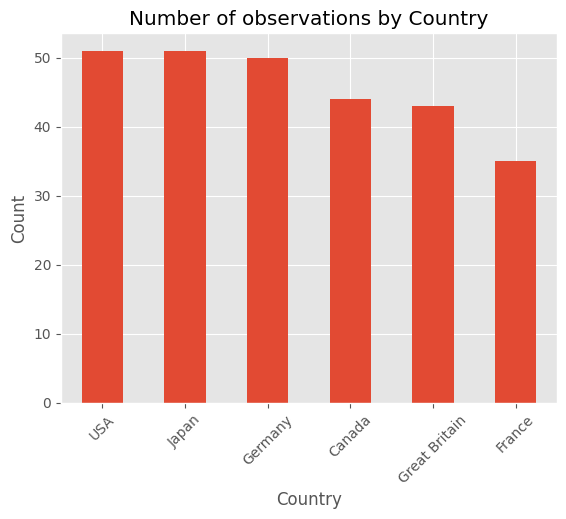

In [6]:
df["Country"].value_counts().plot(kind="bar", rot=45)
plt.ylabel("Count")
plt.title("Number of observations by Country")
plt.show()

- L'étude de l'expérience de vie est réalisée sur un ensemble de 6 pays : le Japon, les USA, l'Allemagne, le Canada, la Grande-Bretagne et la France.
- Les 3 premiers pays possèdent le plus d'obervations (51, 51, 50), les 2 suivants apparaissent respectivement 44 et 43 fois, et le dernier 35 fois.

**3. Analyse de la variable `Spending_USD`**

In [7]:
df["Spending_USD"].describe()

count      274.000000
mean      2789.338905
std       2194.939785
min        123.993000
25%       1038.357000
50%       2295.578000
75%       4055.610000
max      11859.179000
Name: Spending_USD, dtype: float64

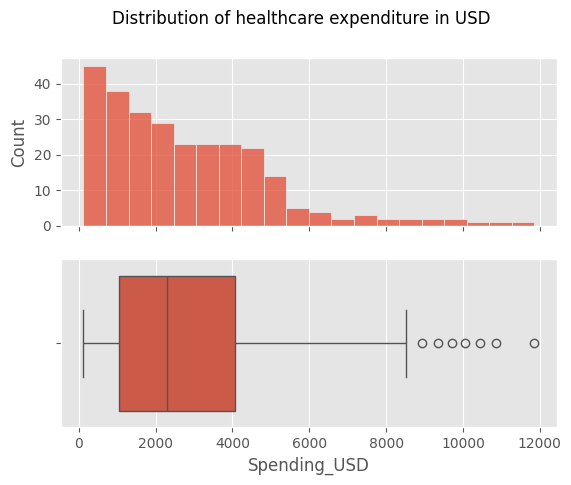

In [8]:
fig, axes = plt.subplots(2, 1, sharex=True)
sns.histplot(data=df, x="Spending_USD", bins=20, ax=axes[0])
sns.boxplot(data=df, x="Spending_USD", ax=axes[1])
fig.suptitle("Distribution of healthcare expenditure in USD")
plt.show()

- Les habitants des pays concernés par l'étude ont alloué en moyenne un budget annuel de 2789$ aux dépenses de santé entre 1970 et 2020.
- Les dépenses les plus élevées sont peu fréquentes comparées aux faibles dépenses.
- Le boxplot confirme cette observation avec plusieurs valeurs "anormalement" élevées.

**4. Analyse de la variable `Life_Expectancy`**

In [9]:
df["Life_Expectancy"].describe()

count    274.000000
mean      77.909489
std        3.276263
min       70.600000
25%       75.525000
50%       78.100000
75%       80.575000
max       84.700000
Name: Life_Expectancy, dtype: float64

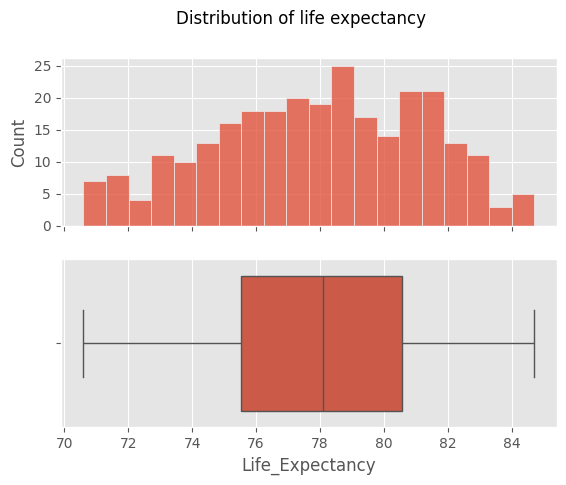

In [10]:
fig, axes = plt.subplots(2, 1, sharex=True)
sns.histplot(data=df, x="Life_Expectancy", bins=20, ax=axes[0])
sns.boxplot(data=df, x="Life_Expectancy", ax=axes[1])
fig.suptitle("Distribution of life expectancy")
plt.show()

- L'espérance de vie est en moyenne de 78 ans, avec un écart-type de 3,2 ans, un minimum à 70,6 ans et un maximum à 84,7 ans. La distribution semble normale.

**5. Evolution de la durée de vie à travers le temps**

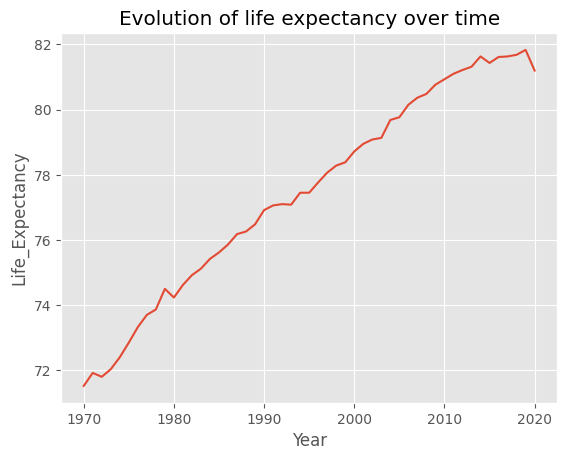

In [11]:
df.groupby("Year")["Life_Expectancy"].mean().plot()
plt.ylabel("Life_Expectancy")
plt.title("Evolution of life expectancy over time")
plt.show()

- L'espérance de vie a connu une croissance apparement linéaire, elle est passée d'environ 72 à 82 ans. 
- En 2020, on note une baisse anormale de cette dernière, peut-être à cause de la pandémie du COVID-19 ?

**6. Différenciation par les pays du graphique précédent**

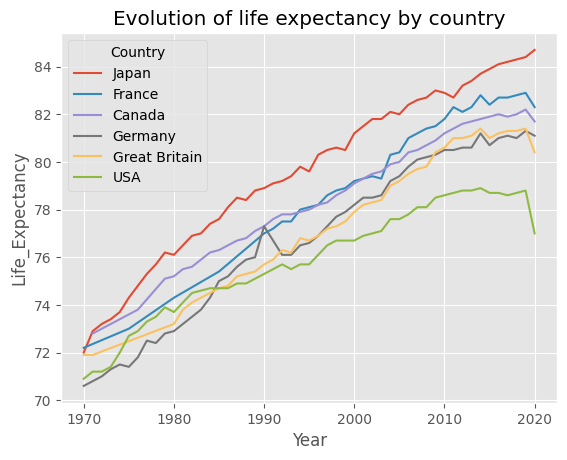

In [12]:
tmp_df_1 = df.groupby(["Year", "Country"])["Life_Expectancy"].mean().reset_index()

# Sort countries according to the decreasing order of their life expectancies for the last year recorded
rows = tmp_df_1.groupby("Country")["Year"].idxmax()
country_order = (
    tmp_df_1.loc[rows]
    .sort_values("Life_Expectancy", ascending=False)["Country"]
    .values.tolist()
)

sns.lineplot(data=tmp_df_1, x="Year", y="Life_Expectancy", hue="Country", hue_order=country_order)
plt.title("Evolution of life expectancy by country")
plt.show()

- Au cours des 50 dernières années, le Japon a maintenu l'espérance de vie la plus élevée (de 72 à 84 ans).
- La France et le Canada suivent, le premier ayant récemment dépassé le second (1995-2000). Partis d'environ 72 ans, ils sont en 2020 autour de 82 ans.
- Viennent ensuite l'Allemagne et la Grande-Bretagne; ils sont en 2020 autour de 81 ans, alors qu'en 1970 on avait un peu moins de 71 ans en Allemagne et 72 en Grande-Bretagne.
- Aux Etats-Unis enfin, l'espérance de vie passe de 71 à 79 ans.
- La baisse de l'espérance de vie en 2020 (COVID ?) a fortement impacté les USA mais beaucoup moins le Japon.

**7. Evolution des dépenses de santé en l'Allemagne et en Grande-Bretagne**

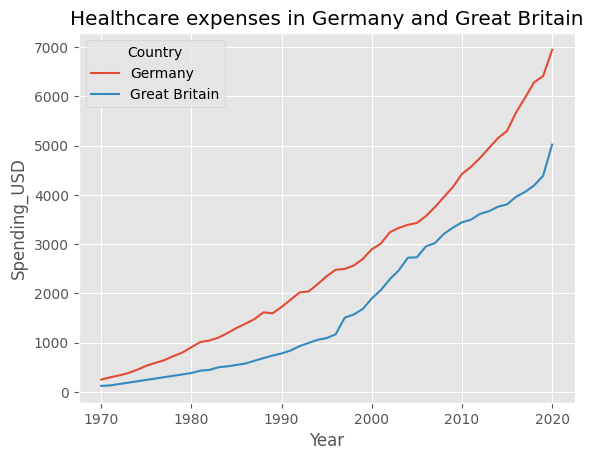

In [13]:
tmp_df = df.query("`Country` in ['Germany', 'Great Britain']")
sns.lineplot(data=tmp_df, x="Year", y="Spending_USD", hue="Country")
plt.title("Healthcare expenses in Germany and Great Britain")
plt.show()

- Les deux courbes sont croissantes; les dépenses de santé croissent avec le temps, peut-être à cause de l'inflation.
- Les dépenses de santé en Allemagne ont toujours été supérieures à celles de la Grande-Bretagne.
- On observe également un écart grandissant entre les deux pays, bien que celui-ci se soit légèrement réduit entre les années 1995 et 2010.
- La tendance en Allemagne a l'air plus régulière que celle en Grande-Bretagne, suggérant potentiellement des changements de politiques en matière de santé.

**8. Histogramme, boxplot, et statistiques de `Life_Expectancy` propres à chaque pays**

In [14]:
# Sort the data according to the order defined in 6.
# The decreasing order of their life expectancies for the last year recorded
country_order_dict = {country: i for i, country in enumerate(country_order)}
country_sort_key = lambda country: country.map(country_order_dict)
tmp_df_2 = df.sort_values("Country", key=country_sort_key)

In [15]:
tmp_df_2.groupby("Country")["Life_Expectancy"].describe().sort_index(key=country_sort_key).T

Country,Japan,France,Canada,Germany,Great Britain,USA
count,51.000000,35.000000,44.000000,50.000000,43.000000,51.000000
mean,79.554902,79.565714,78.706818,76.726000,77.620930,75.843137
std,3.547242,2.862120,2.502222,3.473915,2.827548,2.336258
min,72.000000,72.200000,72.800000,70.600000,71.900000,70.900000
25%,76.950000,78.050000,76.775000,73.575000,75.350000,74.550000
50%,79.800000,79.400000,78.700000,77.100000,77.500000,75.700000
75%,82.650000,82.200000,80.975000,80.175000,80.400000,77.950000
max,84.700000,82.900000,82.200000,81.300000,81.400000,78.900000


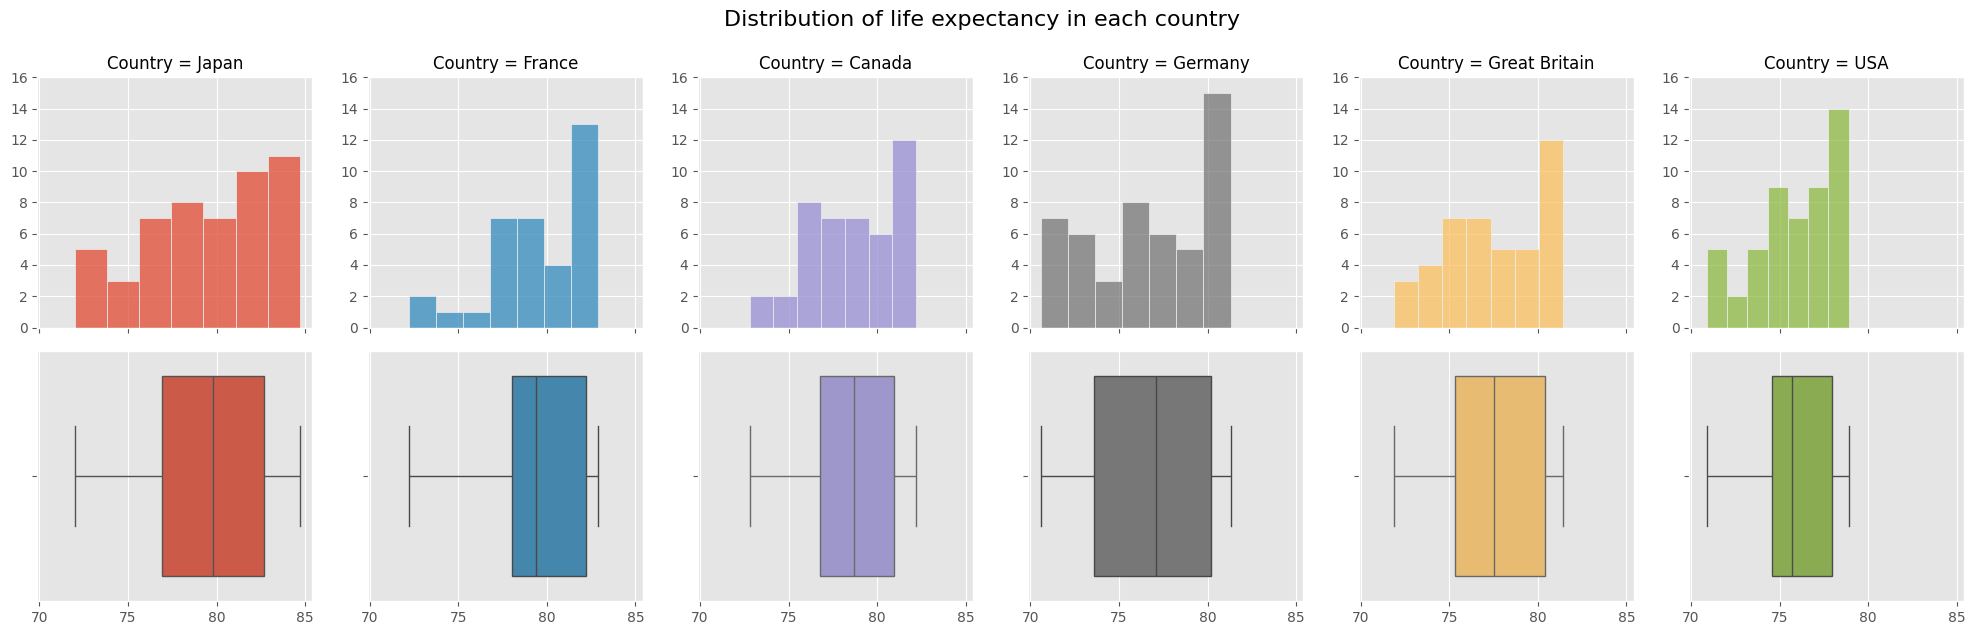

In [16]:
fig, axes = plt.subplots(2, 6, figsize=(20, 6), sharex=True)

# Get the colors of the current theme
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

for i in range(6):
    sns.histplot(data=tmp_df_2.query(f"`Country` == '{country_order[i]}'"), x="Life_Expectancy", color=colors[i], ax=axes[0, i])
    sns.boxplot(data=tmp_df_2.query(f"`Country` == '{country_order[i]}'"), x="Life_Expectancy", color=colors[i], ax=axes[1, i])

    axes[0, i].set_title(f"Country = {country_order[i]}", fontsize=12)
    axes[0, i].set_xlabel("")
    axes[0, i].set_ylabel("")
    axes[0, i].set_ylim(0, 16)
    axes[1, i].set_xlabel("")

plt.tight_layout()
fig.suptitle("Distribution of life expectancy in each country", y=1.05, fontsize=16)
plt.show()

- Les observations en 6. sur le classement des pays en termes d'espérance de vie sont retrouvées ici.
- Les nouveaux graphiques complètent ces informations en révélant :
  - Une variance beaucoup importante au Japon et en Allemagne.
  - Des distributions légèrement asymétriques vers la gauche, ce qui traduirait une croissance rapide de l'espérance de vie. En effet, les valeurs plus anciennes (plus basses) seraient moins fréquentes que les valeurs plus récentes (plus élevées).

**9. Relation entre la durée de vie et les dépenses dans la santé aux USA de 2000 à 2020**

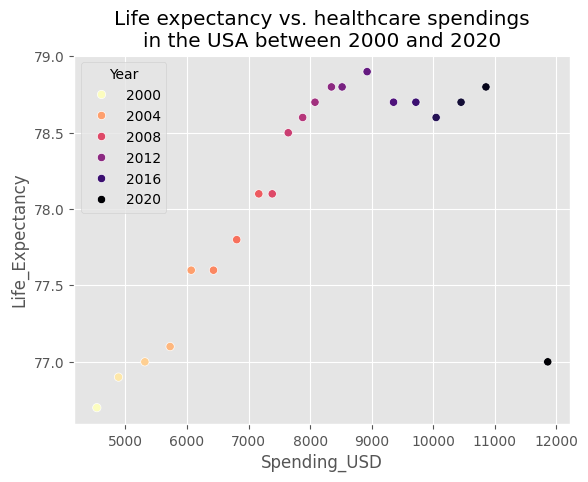

In [17]:
tmp_df_3 = df.query("`Year` >= 2000 & `Country` == 'USA'")
sns.scatterplot(data=tmp_df_3, x="Spending_USD", y="Life_Expectancy", hue="Year", palette="magma_r")
plt.title("Life expectancy vs. healthcare spendings\nin the USA between 2000 and 2020")
plt.show()

- Comme précédemment, on remarque que les dépenses de santé augmentent avec le temps.
- Une relation croissante entre les dépenses de santé et l'espérance de vie s'observe aussi entre 2000 et 2015 :
  - Les dépenses passent de 4500$ à 9000$ (+300$/an en moyenne)
  - L'espérance de vie passe de 76,5 ans à 79 ans.
- A partir de 2015 par contre, tandis que les dépenses continuent d'augmenter (à hauteur d'environ 500$/an), l'espérance de vie elle tend à se stabiliser autour de 78,7 ans.
- En 2020 c'est la catastrophe : une grande augmentation des dépenses de santé (+1000$ en 1 an), mais une espérance de vie qui dégringole pour retrouver son niveau des années 2000 (77 ans).